## Importing the necessary Packages

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import datasets
from keras import layers
from tensorflow.keras import models
from keras.utils import to_categorical
import os
%matplotlib inline

## Load Image Data

In [37]:
(X_train,y_train,),(X_test,y_test)=datasets.cifar10.load_data()

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## Images Data Exploration and Visualization

In [39]:
X_train[0].shape

(32, 32, 3)

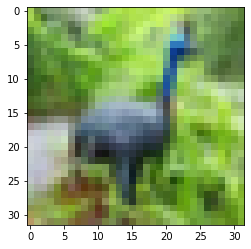

In [40]:
plt.imshow(X_train[6])

In [10]:
X_train[6]

array([[[164, 206,  84],
        [105, 140,  61],
        [118, 148, 101],
        ...,
        [109, 147,  73],
        [108, 147,  69],
        [ 91, 129,  57]],

       [[167, 213,  84],
        [116, 160,  49],
        [ 72, 109,  43],
        ...,
        [105, 142,  79],
        [105, 142,  72],
        [ 89, 127,  57]],

       [[140, 191,  65],
        [142, 193,  66],
        [119, 163,  79],
        ...,
        [104, 139,  84],
        [ 84, 120,  58],
        [ 78, 115,  49]],

       ...,

       [[139, 148,  81],
        [142, 155,  74],
        [135, 156,  72],
        ...,
        [ 89, 134,  28],
        [ 97, 148,  24],
        [126, 176,  49]],

       [[163, 157,  85],
        [153, 164,  82],
        [146, 164,  90],
        ...,
        [ 85, 130,  19],
        [ 98, 148,  27],
        [127, 178,  48]],

       [[183, 153, 102],
        [176, 182, 116],
        [154, 154, 100],
        ...,
        [ 94, 134,  29],
        [ 91, 133,  26],
        [122, 170,  44]]

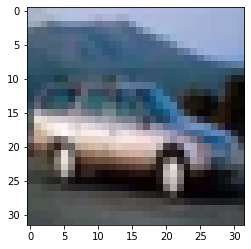

In [41]:
plt.imshow(X_train[4])

In [42]:
y_train[4]

array([1], dtype=uint8)

## Image Data Preprocessing and Visualization

In [43]:
y_train=y_train.reshape(-1,)
y_train[:4]

array([6, 9, 9, 4], dtype=uint8)

In [44]:
classes=["airplan","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [45]:
def plot_sample(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

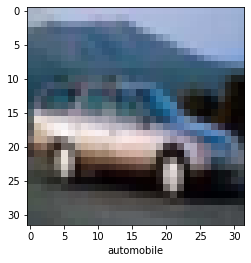

In [46]:
plot_sample(X_train,y_train,4)

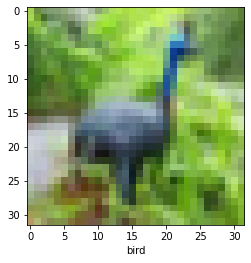

In [47]:
plot_sample(X_train,y_train,6)

## Normalization of the image date

In [48]:
X_train=X_train.astype('float32')
X_train=X_train.astype('float32')
X_train=X_train/255.0
X_test=X_test/255.0
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


## Build first Model using Artifical Neural Netwok

In [49]:
model_ann= tf.keras.models.Sequential()

In [50]:
model_ann.add(tf.keras.layers.Flatten(input_shape=(32, 32,3)))

In [51]:
model_ann.add(tf.keras.layers.Dense(3000, activation='relu'))

In [52]:
model_ann.add(tf.keras.layers.Dense(1000, activation='relu'))

In [53]:
model_ann.add(tf.keras.layers.Dense(10, activation='softmax'))

## Compile the Model

In [54]:
model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
model_ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_8 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_9 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [59]:
ann=model_ann.fit(X_train, y_train, epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 216s 138ms/step - loss: 1.4534 - accuracy: 0.4784 - val_loss: 1.5235 - val_accuracy: 0.4564
Epoch 2/5
1563/1563 [==============================] - 220s 140ms/step - loss: 1.4210 - accuracy: 0.4916 - val_loss: 1.4718 - val_accuracy: 0.4673
Epoch 3/5
1563/1563 [==============================] - 215s 137ms/step - loss: 1.3942 - accuracy: 0.5010 - val_loss: 1.4683 - val_accuracy: 0.4809
Epoch 4/5
1563/1563 [==============================] - 213s 136ms/step - loss: 1.3793 - accuracy: 0.5065 - val_loss: 1.4605 - val_accuracy: 0.4763
Epoch 5/5
1563/1563 [==============================] - 215s 137ms/step - loss: 1.3586 - accuracy: 0.5147 - val_loss: 1.5008 - val_accuracy: 0.4686


## Accuracy of the training and validationa data

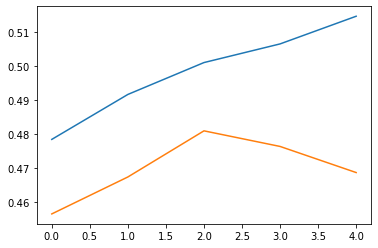

In [60]:
plt.plot(ann.history['accuracy'])
plt.plot(ann.history['val_accuracy'])

## Evaluating the model

In [63]:
evaluation=model_ann.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.5008 - accuracy: 0.4686


In [64]:
evaluation

[1.5007822513580322, 0.46860000491142273]

In [65]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=model_ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.50      0.52      1000
           1       0.46      0.74      0.57      1000
           2       0.41      0.26      0.32      1000
           3       0.31      0.45      0.36      1000
           4       0.48      0.31      0.38      1000
           5       0.43      0.29      0.35      1000
           6       0.53      0.51      0.52      1000
           7       0.50      0.57      0.53      1000
           8       0.58      0.63      0.61      1000
           9       0.49      0.42      0.45      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



## Second Model training using Convolutional Neural Network

In [67]:
CNN= tf.keras.models.Sequential([
#CNN
     layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
     layers.MaxPooling2D(2,2),
     layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D(2,2),
#Dense
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(10, activation='softmax')
])

## Compile the Model

In [68]:
CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [69]:
CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

## Training the model

In [70]:
cnn=CNN.fit(X_train, y_train, epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 47s 28ms/step - loss: 1.4929 - accuracy: 0.4615 - val_loss: 1.2390 - val_accuracy: 0.5692
Epoch 2/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1335 - accuracy: 0.6006 - val_loss: 1.1051 - val_accuracy: 0.6120
Epoch 3/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0057 - accuracy: 0.6494 - val_loss: 1.0367 - val_accuracy: 0.6456
Epoch 4/5
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9211 - accuracy: 0.6793 - val_loss: 0.9334 - val_accuracy: 0.6797
Epoch 5/5
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8595 - accuracy: 0.6993 - val_loss: 0.9275 - val_accuracy: 0.6814


## Accuracy of the training and validationa data

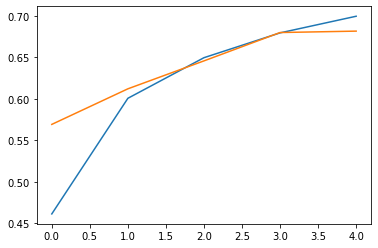

In [72]:
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])

## Evaluating the model

In [73]:
evaluation=CNN.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9275 - accuracy: 0.6814


In [75]:
evaluation

[0.9275484085083008, 0.6814000010490417]

In [76]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=CNN.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72      1000
           1       0.86      0.76      0.81      1000
           2       0.61      0.49      0.55      1000
           3       0.50      0.44      0.47      1000
           4       0.58      0.67      0.62      1000
           5       0.55      0.66      0.60      1000
           6       0.79      0.74      0.76      1000
           7       0.70      0.78      0.74      1000
           8       0.69      0.85      0.77      1000
           9       0.82      0.74      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

